# Generating Synthetic Data

MLJ has a set of functions that generate random data sets.  They are great for testing machine learning models at design and evaluation time.  

In [1]:
using MLJ, VegaLite, DataFrames

##  Generating Gaussian Blobs

Function **make_blobs** generates gaussian blobs with `n` examples of `p` features. The function returns a `n x p` matrix with the samples and a `n` integer vector indicating the membership of each point.  The function input arguments are:

* `shuffle=true`:             whether to shuffle the resulting points,
* `centers=3`:                either a number of centers or a `c x p` matrix with `c` pre-determined centers,
* `cluster_std=1.0`:          the standard deviation(s) of each blob,
* `center_box=(-10. => 10.)`: the limits of the `p`-dimensional cube within which the cluster centers are drawn if they are not provided,

**make_blobs** is useful when implementing *K Means* clustering or classification machine learning models.

In [2]:
X, y = make_blobs(100, 3; centers=2, cluster_std=[1.0, 3.0])
dfBlobs = copy(DataFrame(X))
dfBlobs.y = y
dfBlobs

,x1,x2,x3,y
,Float64,Float64,Float64,Cat…
1,-7.74436,-7.41381,-7.16619,2
2,-10.1698,3.63447,7.75779,1
3,-9.86996,2.67568,6.31162,1
4,-8.56447,-3.19877,-2.3163,2
5,-9.05949,-9.47397,-6.59931,2
6,-11.2632,0.66433,6.75901,1
7,-11.6325,2.21453,6.98552,1
8,-4.88984,-1.13137,-1.84656,2
9,-10.0913,3.01985,5.71275,1


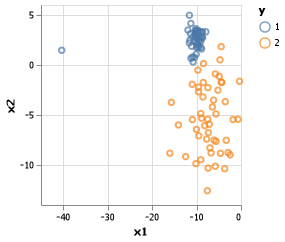

In [3]:
dfBlobs |> @vlplot(:point, x=:x1, y=:x2, color = :"y:n") 

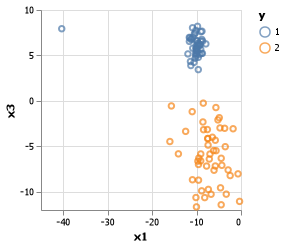

In [4]:
dfBlobs |> @vlplot(:point, x=:x1, y=:x3, color = :"y:n") 

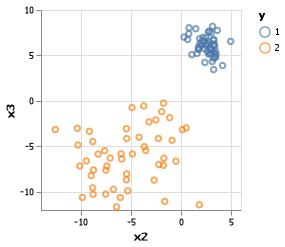

In [5]:
dfBlobs |> @vlplot(:point, x=:x2, y=:x3, color = :"y:n") 

##  Generating Circumscribed Circles

The function **make_circles** generate `n` points along two circumscribed circles returning the `n x 2` matrix of points and a vector of membership (0, 1) depending on whether the points are on the smaller circle (0) or the larger one (1).  The function input arguments are:

* `shuffle=true`:   whether to shuffle the resulting points,
* `noise=0`:        standard deviation of the gaussian noise added to the data,
* `factor=0.8`:     ratio of the smaller radius over the larger one,

Wiki says that "in geometry, the circumscribed circle or circumcircle of a polygon is a circle that passes through all the vertices of the polygon. The center of this circle is called the circumcenter and its radius is called the circumradius. Not every polygon has a circumscribed circle." **make_circles** is useful in clustering and classification machine learning models.



In [6]:
X, y = make_circles(100; noise=0.5, factor=0.3)
dfCircles = copy(DataFrame(X))
dfCircles.y = y
dfCircles

,x1,x2,y
,Float64,Float64,Cat…
1,0.33769,0.699376,1
2,0.913377,0.0256294,1
3,1.39875,0.223683,1
4,-0.110211,-0.369423,1
5,0.166187,-0.227497,0
6,0.783904,-0.46014,0
7,-0.00586847,-0.102573,0
8,0.45843,-0.245545,1
9,-0.440613,0.0215399,1


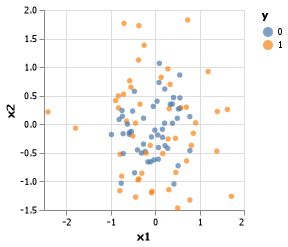

In [7]:
dfCircles |> @vlplot(:circle, x=:x1, y=:x2, color = :"y:n") 

##  Sampling from Two Interleaved Half-Circles

The function **make_moons** generates `n` examples sampling from two interleaved half-circles returning the `n x 2` matrix of points and a vector of membership (0, 1) depending on whether the points are on the half-circle on the left (0) or on the right (1).  The input arguments are:  
* `shuffle=true`:   whether to shuffle the resulting points,
* `noise=0.1`:      standard deviation of the gaussian noise added to the data,
* `xshift=1.0`:     horizontal translation of the second center with respect to the first one.
* `yshift=0.3`:     vertical translation of the second center with respect to the first one.
                    
                    
**make_moons** is useful in clustering and classification machine learning models as well. 


In [8]:
X, y = make_moons(100; noise=0.5)
dfHalfCircles = copy(DataFrame(X))
dfHalfCircles.y = y
dfHalfCircles

,x1,x2,y
,Float64,Float64,Cat…
1,-1.10471,-0.0278162,0
2,-0.0837225,1.01048,0
3,-0.253319,1.32256,0
4,2.86429,0.0627405,1
5,0.662783,0.462371,0
6,0.855233,0.0402073,1
7,-0.0425329,-0.30716,1
8,-0.401498,0.143834,1
9,1.59789,-0.842948,1


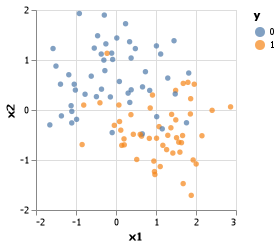

In [9]:
dfHalfCircles |> @vlplot(:circle, x=:x1, y=:x2, color = :"y:n") 

## Generating Linear Regression

Let us not forget about linear regression.  The function **make_regression** generates data useful to test linear regression models.  The input arguments are:

* `intercept=true`:	whether to generate data from a model with intercept,
* `sparse=0`:		portion of the generating weight vector that is sparse,
* `noise=0.1`:		standard deviation of the gaussian noise added to the response,
* `outliers=0`:		portion of the response vector to make as outliers by ading a random quantity with high variance. (Only applied if `binary` is `false`)
* `binary=false`:	whether the target should be binarized (via a sigmoid).


Next are 5 predictors and target *Y* that can be used for testing in a multivariable linear regression.

In [10]:
X, y = make_regression(100, 5; noise=0.5, sparse=0.2, outliers=0.1)
dfRegression = copy(DataFrame(X))
dfRegression.y = y
dfRegression

,x1,x2,x3,x4,x5,y
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.719501,2.02814,-0.394187,0.220278,-0.492069,-4.11994
2,-0.313062,1.03202,0.378857,1.31031,-0.404306,-2.3975
3,-1.3293,0.696048,-0.765997,1.17801,0.491798,-0.310831
4,-0.643634,-0.524536,0.765439,0.43294,1.14025,2.26331
5,-1.19567,0.593586,-0.246381,-0.411864,0.435686,0.270744
6,0.746536,-0.600715,-1.65274,0.0706253,1.43854,3.10131
7,-0.468623,-1.92497,0.102802,0.540004,-1.04083,4.17229
8,-0.120229,-1.07884,-2.60317,-1.30022,1.04621,3.1305
9,-1.54855,0.754663,0.95779,-0.931267,-0.351091,-1.90939
